

![](img/1.png)
---
![](img/2.png)
---
![](img/3.png)
---


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo

def f(X):
    """ Give a scalar X, return some value(a real number) """
    Y = (1.5 - X)**2 + 0.5
    print(f'X = {X}, Y = {Y}')  # for tracing
    return Y

Xguess = 2.0
min_result = spo.minimize(f, Xguess, method='SLSQP', options={'disp': True})
print("Minima found at: ")
print(f"X = {min_result.x}, Y = {min_result.fun}")

X = [2.], Y = [0.75]
X = [2.], Y = [0.75]
X = [2.00000001], Y = [0.75000001]
X = [0.99999999], Y = [0.75000001]
X = [1.5], Y = [0.5]
X = [1.5], Y = [0.5]
X = [1.50000001], Y = [0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
Minima found at: 
X = [1.5], Y = 0.5


![](img/4.png)
---
![](img/5.png)
---
![](img/6.png)
---
![](img/7.png)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 161.49616221130705
            Iterations: 5
            Function evaluations: 24
            Gradient evaluations: 5
Fitted Line: C0 = 3.8337794040301536, C1 = 4.111425912125463


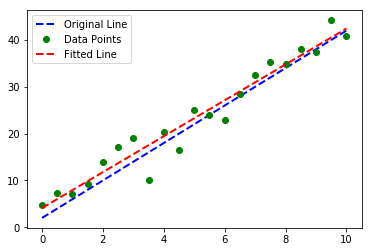

In [24]:
def error(line, data):
    """ Compute error between given line model and observed data 
    Parameters
    -----------
    line: (C0, C1), where C0 is slope and C1 is Y-intercept
    data: 2d array where each array is a point (x, y)
    """
    err = np.sum((data[:, 1] - (line[0] * data[:, 0] + line[1])) ** 2)
    return err


def fit_line(data, error_func):
    l = np.float32([0, np.mean(data[:, 1])])
    result = spo.minimize(error_func, l, args=(data,), method='SLSQP', options={'disp': True})
    return result.x

# Define original line
l_orig = np.float32([4, 2])
Xorig = np.linspace(0, 10, 21)
Yorig = l_orig[0] * Xorig + l_orig[1]
plt.plot(Xorig, Yorig, 'b--', linewidth=2.0, label="Original Line")

# Generate noisy data points
noise_sigma = 3.0
noise = np.random.normal(0, noise_sigma, Yorig.shape)
data = np.asarray([Xorig, Yorig+noise]).T
plt.plot(data[:, 0], data[:, 1], 'go', label='Data Points')

# Try to fit a line to this data
l_fit = fit_line(data, error)
print(f"Fitted Line: C0 = {l_fit[0]}, C1 = {l_fit[1]}")
plt.plot(data[:, 0], l_fit[0]*data[:, 0]+l_fit[1], 'r--', linewidth=2.0, label="Fitted Line")
plt.legend(loc='upper left')
plt.show()

4.0